In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
# Loading the dataset
laptop_data = pd.read_csv('C:\\Users\\YOGINATH\\Desktop\\laptop_price_predict\\laptop.csv')
laptop_data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
laptop_data.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [6]:
laptop_data= laptop_data.dropna()

In [7]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1273 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 139.2+ KB


In [8]:
laptop_data = laptop_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Weight', 'ScreenResolution', 'TypeName'], errors='ignore')
laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '').astype(int)

In [9]:
laptop_data.head()

,Company,Inches,Cpu,Ram,Memory,Gpu,OpSys,Price
0,Apple,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832
1,Apple,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000
3,Apple,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360
4,Apple,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080


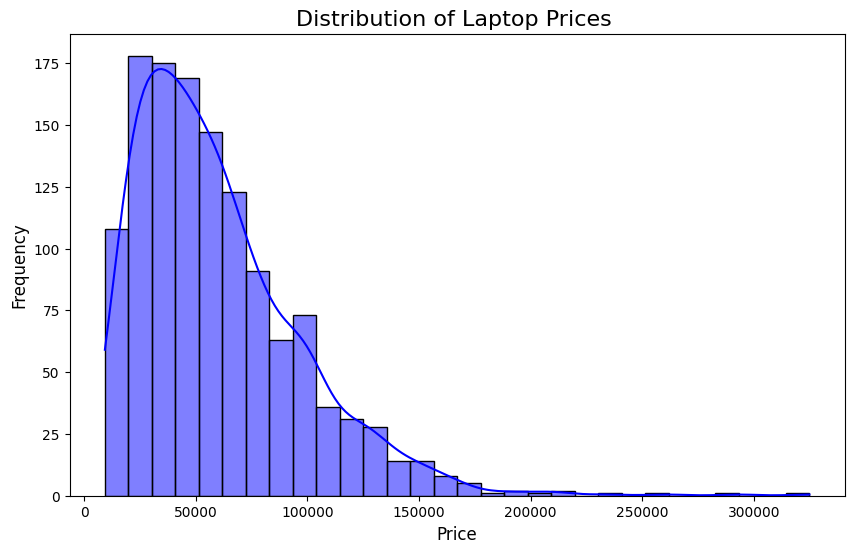

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(laptop_data['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Laptop Prices ', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [11]:
# Apply log transformation to positively skewed columns
laptop_data['Price'] = np.log1p(laptop_data['Price'])

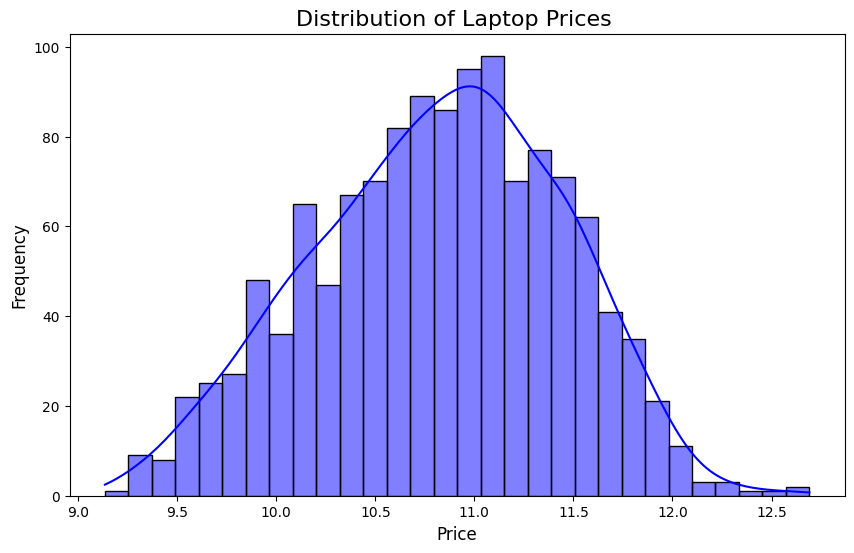

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(laptop_data['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Laptop Prices ', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

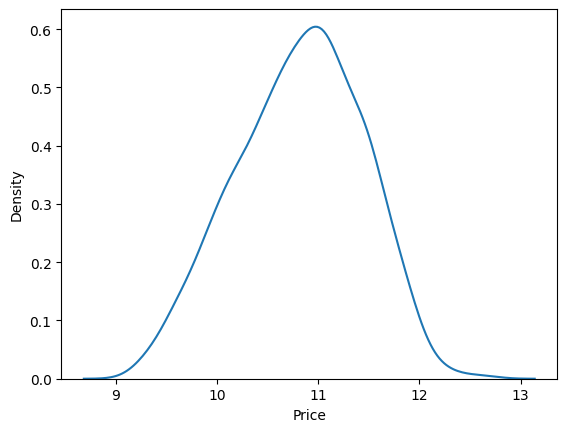

In [13]:
sns.kdeplot(laptop_data[('Price')])

C:\Users\YOGINATH\AppData\Local\Temp\ipykernel_12176\1376183358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=laptop_data, x='Company', y='Price', palette='Set2')


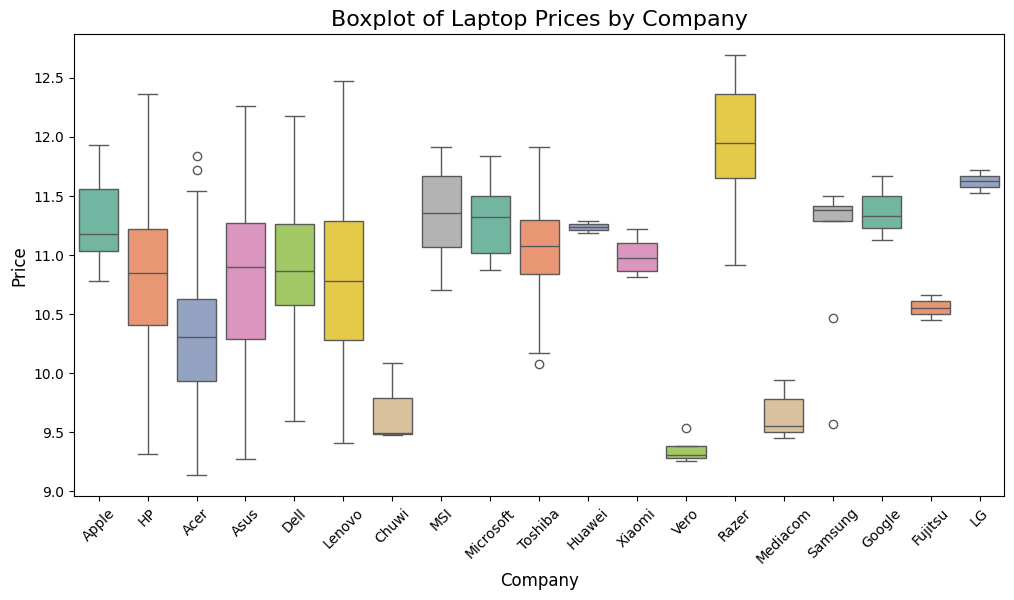

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=laptop_data, x='Company', y='Price', palette='Set2')
plt.title('Boxplot of Laptop Prices by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
categorical_cols = ['Company', 'OpSys','Cpu','Gpu','Memory']
laptop_data = pd.get_dummies(laptop_data, columns=categorical_cols, drop_first=True)

In [16]:
laptop_data.head()

,Inches,Ram,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD,Memory_?
0,13.3,8,11.175769,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,10.776798,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,10.329964,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,11.814483,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,11.473111,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
laptop_data

,Inches,Ram,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD,Memory_?
0,13.3,8,11.175769,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,10.776798,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,10.329964,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,11.814483,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,11.473111,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14,4,10.433929,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1299,13.3,16,11.288127,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1300,14,2,9.409365,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1301,15.6,6,10.614153,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [18]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Columns: 294 entries, Inches to Memory_?
dtypes: bool(291), float64(1), int64(1), object(1)
memory usage: 401.5+ KB


In [19]:
laptop_data = laptop_data.replace('?', np.nan)
laptop_data=laptop_data.dropna()


In [20]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Columns: 294 entries, Inches to Memory_?
dtypes: bool(291), float64(1), int64(1), object(1)
memory usage: 401.2+ KB


In [21]:
# Splitting data into features and target
X = laptop_data.drop(columns=['Price'])
y = laptop_data['Price']
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
X_train


,Inches,Ram,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD,Memory_?
756,15.6,8,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
93,15.6,8,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
820,15.6,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
552,17.3,16,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,13.3,8,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,17.3,12,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
858,13.3,8,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
652,13.3,8,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1292,15.6,2,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.06461970894135355
R^2 Score: 0.8434868887172273


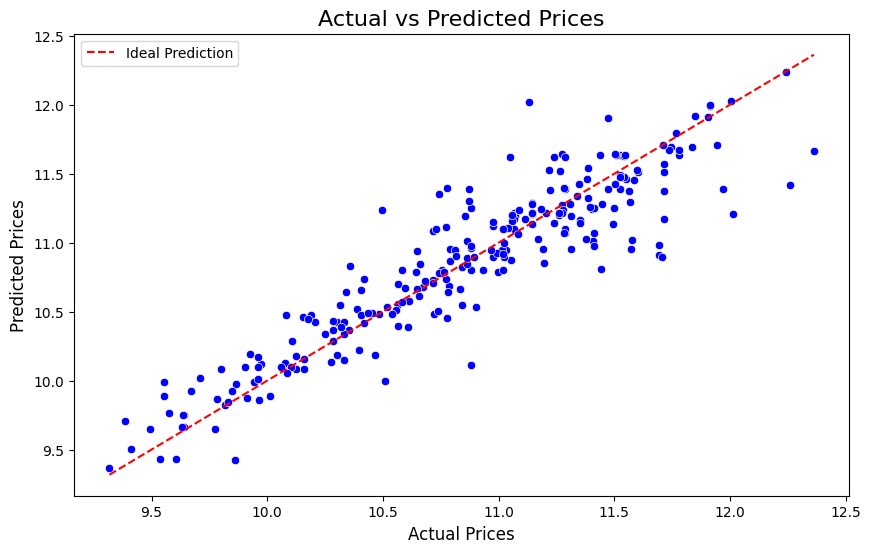

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.legend()
plt.show()

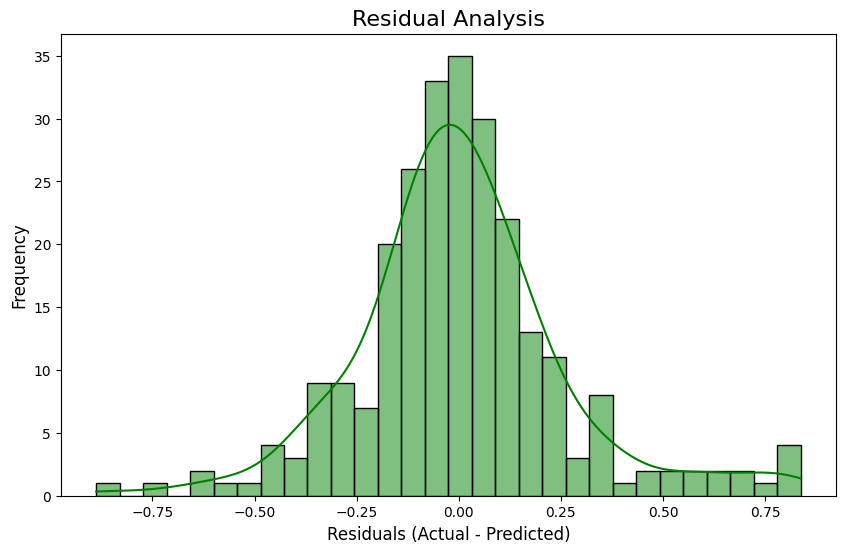

In [26]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Residual Analysis', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [27]:
def predict_price(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)
    return prediction[0]


In [28]:
# Real-time Prediction Example
def predict_price(input_data, model, X_train):
    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Ensure the input data has the same columns as the training data
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

    # Predict the price using the trained model
    prediction = model.predict(input_df)
    return prediction[0]

# Example input for a new laptop
new_laptop = {
    'Inches': 15.6,
    'Ram': 4,
    '500GB HDD':1,
    'Company_HP': 1,
    'Company_Chuwi':0,
    'OpSys_Windows': 1,
    'OpSys_macOS': 0,
    'Processor_i3': 1,  # Example encoding for processor
    'Intel HD Graphics 520': 1     # Example encoding for GPU
}

predicted_price = predict_price(new_laptop, model, X_train)
predicted_price = np.exp(predicted_price)
print(f'Predicted Price for the new laptop: {predicted_price}')


Predicted Price for the new laptop: 22387.481972132642


In [31]:
joblib.dump(model, 'laptop_price_model.pkl')
model_columns = laptop_data.columns.tolist()  # If you're saving from a DataFrame
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [32]:
joblib.dump(X_train, 'X_train.pkl')

['X_train.pkl']